# Notebook for stencil validation and timing

Jan, Nina Horat & Laura Endres

In [27]:
#Libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess
import numpy as np

In [29]:
#Name Lists
stencil_name_list = [
        "laplacian1d", 
        "laplacian2d",
        "laplacian3d",
        "FMA",
       "lapoflap1d",
        "lapoflap2d",
        "lapoflap3d",
    ]

backend_list = ["numpy", 
                "numba_vector_function", 
                "numba_vector_decorator", 
                "numba_loop", 
                "numba_stencil", 
                "gt4py",
                "cupy",
                "numba_cuda"]
backend_list = ["gt4py"]

gt4py_backend_list = [
        "gtx86", 
        "gtmc", 
        "gtcuda"]

## Validation
### Create testfields
We create one testfield per stencil_name (option --create_field = True). After creation the fields are saved in the folder testfields and can be accessed by the option --field_name.

In [13]:
#comment out if you want to create new validation fields

for x in stencil_name_list:
    
    
    bashCommand=f"/users/course43/HPC4WC_venv/bin/python stencil_main_validation.py --nx 32 --ny 32 --nz 32 --stencil_name {x} --backend numpy --create_field True --field_name {x}"
    process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE,stderr=subprocess.PIPE)
    output, error = process.communicate()
    
    print(x)
    print(output)

laplacian1d
b'New output field laplacian1d saved.\n'
laplacian2d
b'New output field laplacian2d saved.\n'
laplacian3d
b'New output field laplacian3d saved.\n'
FMA
b'New output field FMA saved.\n'
lapoflap1d
b'New output field lapoflap1d saved.\n'
lapoflap2d
b'New output field lapoflap2d saved.\n'
lapoflap3d
b'New output field lapoflap3d saved.\n'


In [14]:
for x in stencil_name_list:
    print(x,':')
    for y in backend_list:
        
        if y=='gt4py':
            if x=='test':
                print('There is no test stencil in gt4py.')
            else:
                for z in gt4py_backend_list:
                    bashCommand=f"/users/course43/HPC4WC_venv/bin/python stencil_main_validation.py --nx 32 --ny 32 --nz 32 --stencil_name {x} --backend {y} --gt4py_backend {z} --create_field False --field_name {x}"
                    process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
                    output, error = process.communicate()
                    print(output.decode("utf-8"),' for ', z)
                
        else:
            bashCommand=f"/users/course43/HPC4WC_venv/bin/python stencil_main_validation.py --nx 32 --ny 32 --nz 32 --stencil_name {x} --backend {y} --create_field False --field_name {x}"
            process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
            output, error = process.communicate()
            print(output.decode("utf-8"))

laplacian1d :
Field validation for stencil laplacian1d in backend gt4py is: True.
  for  gtx86
Field validation for stencil laplacian1d in backend gt4py is: True.
  for  gtmc
Field validation for stencil laplacian1d in backend gt4py is: True.
  for  gtcuda
laplacian2d :
Field validation for stencil laplacian2d in backend gt4py is: True.
  for  gtx86
Field validation for stencil laplacian2d in backend gt4py is: True.
  for  gtmc
Field validation for stencil laplacian2d in backend gt4py is: True.
  for  gtcuda
laplacian3d :
Field validation for stencil laplacian3d in backend gt4py is: True.
  for  gtx86
Field validation for stencil laplacian3d in backend gt4py is: True.
  for  gtmc
Field validation for stencil laplacian3d in backend gt4py is: True.
  for  gtcuda
FMA :
Field validation for stencil FMA in backend gt4py is: True.
  for  gtx86
Field validation for stencil FMA in backend gt4py is: True.
  for  gtmc
Field validation for stencil FMA in backend gt4py is: True.
  for  gtcuda
lapo

## Timing
### Execute Stencil computation for evaluation
In this section the different stencils for the different domain sizes are calculated.


In [45]:
#this takes some time...
#Parameter 
field_size_list = [8,16,32,64, 128, 256, 512]#, 1024]#, 64, 128, 256, 512]
df_name = "gt4py_all_var_iter_2" #Name of evaluation dataframe

#Stencil computation
for size in field_size_list:
    if size <= 32:
        num_iter = 100
    elif size <= 128:
        num_iter = 50
    elif size <= 512:
        num_inter = 25
    else:
        num_iter = 13
    print("size", size, "num_iter", num_iter)
    for x in stencil_name_list:
        print('    ',x,':')
        for y in gt4py_backend_list:
            bashCommand=f"/users/course43/HPC4WC_venv/bin/python stencil_main_performance.py --nx {size} --ny {size} --nz {size} --stencil_name {x} --backend gt4py --gt4py_backend {y} --num_iter {num_iter} --df_name {df_name}"
            process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
            print('                 ',y,' calculated.')
            output, error = process.communicate()
            print(output.decode("utf-8"))

size 8 num_iter 100
     laplacian1d :
                  gtx86  calculated.
Total worktime: 0.05909419059753418 s. In 101 iteration(s) the average lapsed time for one run is 0.0005909419059753418 +/- 1.9658536293588586e-05 s
The average elapsed time of the first 10 run is 0.0005941152572631836 and of the last 10 values is 0.0005881547927856446
New dataframe gt4py_all_var_iter_2 generated.

                  gtmc  calculated.
Total worktime: 0.05853390693664551 s. In 101 iteration(s) the average lapsed time for one run is 0.0005853390693664551 +/- 8.29484894738868e-06 s
The average elapsed time of the first 10 run is 0.0005892753601074219 and of the last 10 values is 0.0005819797515869141

                  gtcuda  calculated.
Total worktime: 0.03842759132385254 s. In 101 iteration(s) the average lapsed time for one run is 0.0003842759132385254 +/- 1.8364201076459024e-05 s
The average elapsed time of the first 10 run is 0.0003866434097290039 and of the last 10 values is 0.00038473606109

### Read out the dataframe and plot results
The program saves the evaluation data into a pandas dataframe (Name is defined with the option --df_name). Subsequently the df can be accessed for further processing within a jupyter notebook.

In [30]:
df_name = "gt4py_all_var_iter_2" #Name of df to evaluate
df = pd.read_pickle("eval/{}_result.pkl".format(df_name))
df.tail(50)

,stencil_name,backend,numba_parallel,numba_cudadevice,gt4py_backend,nx,ny,nz,num_iter,time_total,run_avg,run_stdev,run_first10,run_last10
97,lapoflap1d,gt4py,False,False,gtmc,128,128,128,51,0.062702,0.001254,0.000304,0.001432,0.001210
98,lapoflap1d,gt4py,False,False,gtcuda,128,128,128,51,0.024795,0.000496,0.000028,0.000508,0.000499
99,lapoflap2d,gt4py,False,False,gtx86,128,128,128,51,0.079498,0.001590,0.000013,0.001593,0.001593
100,lapoflap2d,gt4py,False,False,gtmc,128,128,128,51,0.066087,0.001322,0.000018,0.001334,0.001325
101,lapoflap2d,gt4py,False,False,gtcuda,128,128,128,51,0.027159,0.000543,0.000028,0.000552,0.000541
102,lapoflap3d,gt4py,False,False,gtx86,128,128,128,51,0.125867,0.002517,0.000012,0.002520,0.002514
103,lapoflap3d,gt4py,False,False,gtmc,128,128,128,51,0.153171,0.003063,0.000523,0.003815,0.002737
104,lapoflap3d,gt4py,False,False,gtcuda,128,128,128,51,0.036478,0.000730,0.000020,0.000732,0.000725
105,laplacian1d,gt4py,False,False,gtx86,256,256,256,51,0.416580,0.008332,0.000020,0.008331,0.008335
106,laplacian1d,gt4py,False,False,gtmc,256,256,256,51,0.390618,0.007812,0.000015,0.007821,0.007819


## Data analysis:

In [33]:
df1 = pd.read_pickle("eval/{}_result.pkl".format("gt4py_all_var_iter_2"))
#df2 = pd.read_pickle("eval/{}_result.pkl".format("gt4py_64"))  
#df3 = pd.read_pickle("eval/{}_result.pkl".format(df_name)) 

frames = [df1]#, df2]
df_data = pd.concat(frames)


### for different stencils

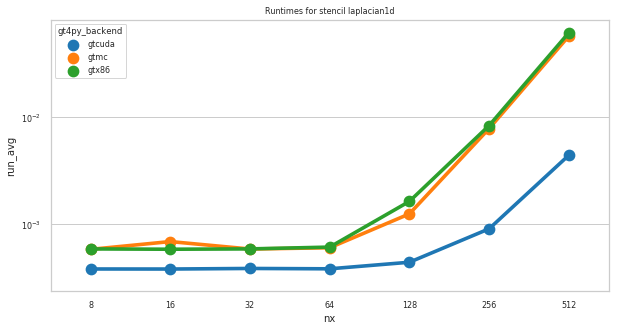

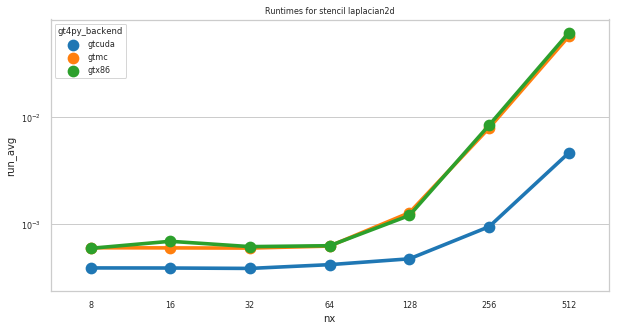

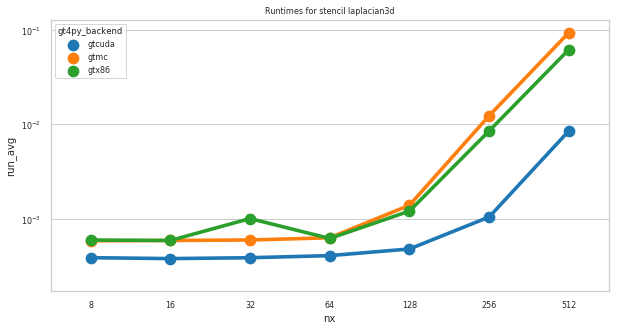

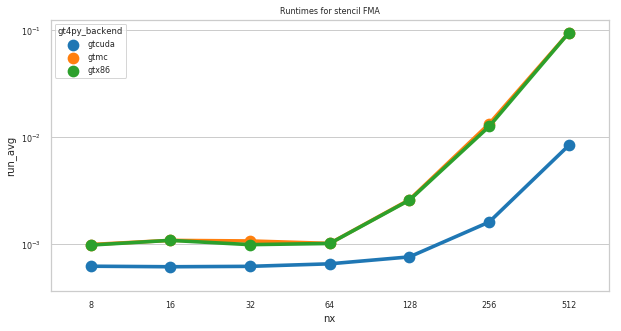

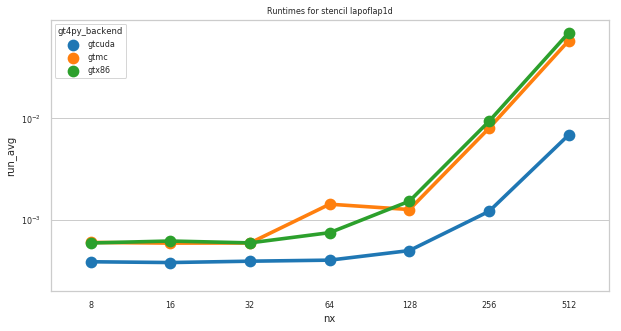

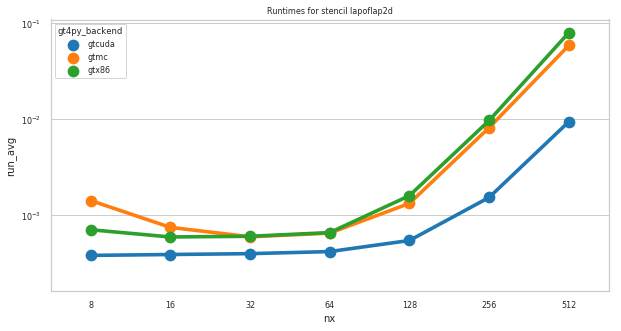

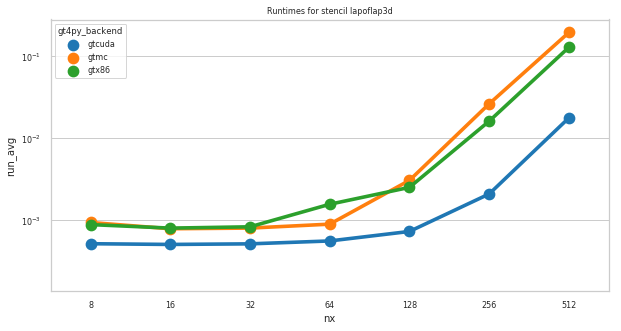

In [35]:
for name in stencil_name_list:
    data_stencil = df_data.loc[df_data["stencil_name"] == name].sort_values(by=["gt4py_backend"])
    #print(data_stencil.head(20))
    plt.figure(figsize=(10,5))
    chart=sns.pointplot(x="nx", y="run_avg", 
                      hue="gt4py_backend",
                      data=data_stencil,ci=False
                     )
    #chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    #chart.legend(loc='upper left')
    plt.title('Runtimes for stencil {}'.format(name))
    #chart.set_title('Runtimes for stencil {}'.format(name))
    chart.set_yscale("log")

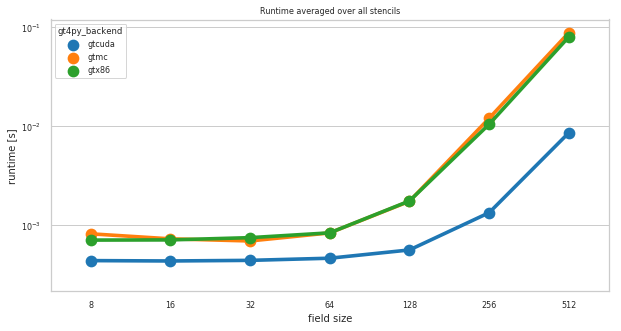

In [36]:
#average over stencils - figure I would put in report
data_stencil = df_data.groupby(['nx','gt4py_backend']).mean()
data_stencil.reset_index(inplace=True)
#print(data_stencil.head(20))
plt.figure(figsize=(10,5))
chart=sns.pointplot(x="nx", y="run_avg", 
                  hue="gt4py_backend",
                  data=data_stencil,ci=False
                 )
chart.set(xlabel='field size', ylabel='runtime [s]')
plt.title('Runtime averaged over all stencils')
chart.set_yscale("log")

## per field size:

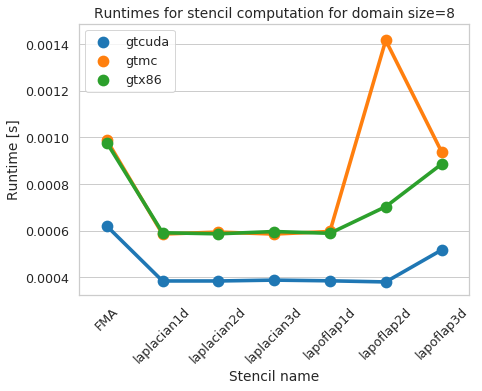

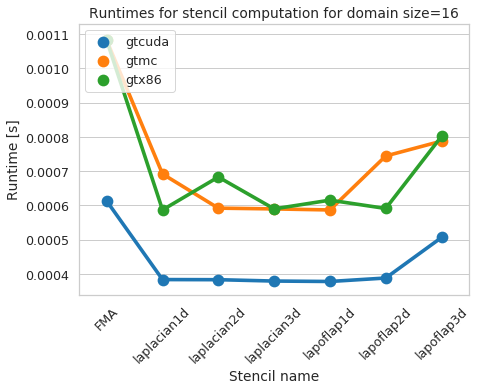

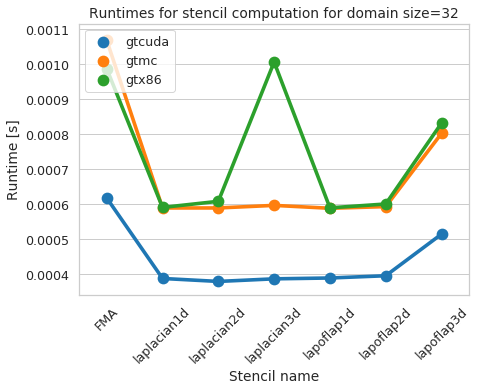

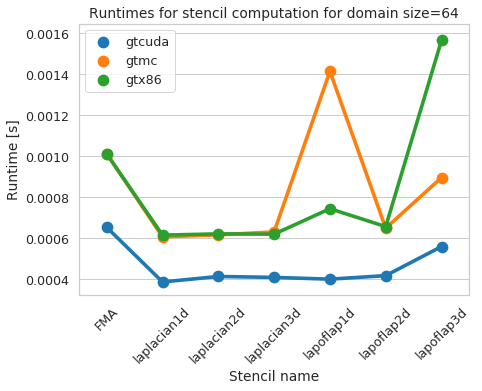

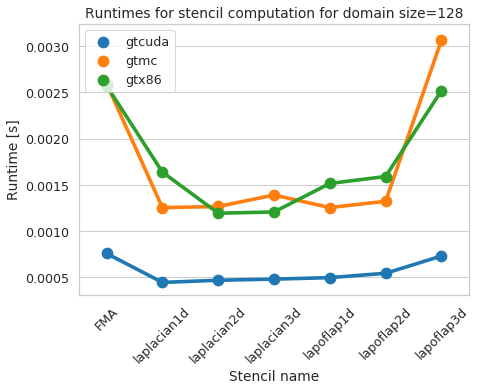

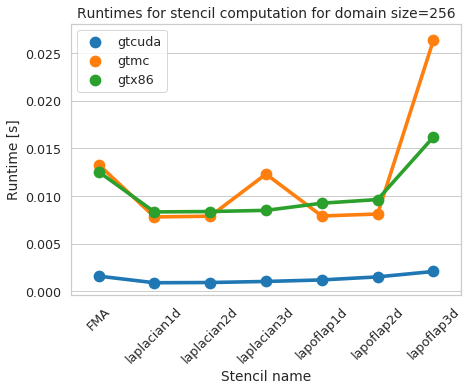

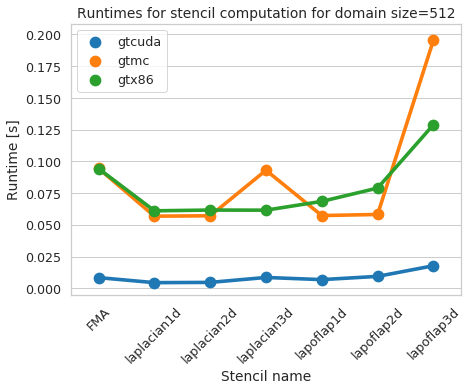

In [37]:
import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
sns.set_context("notebook", font_scale=1.15, rc={"lines.linewidth": 2})


for size in df_data.nx.unique():
    sns.set_style("whitegrid")
    data_field_size = df_data.loc[df_data["nx"] == size].sort_values(by=["gt4py_backend","stencil_name"])
    #print(data_field_size.head(20))
    plt.figure(figsize=(7,5))
    chart=sns.pointplot(x="stencil_name", y="run_avg", hue="gt4py_backend",data=data_field_size, ci=False)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    chart.legend(loc='upper left')
    chart.set(xlabel = "Stencil name", ylabel = "Runtime [s]")
    chart.set_title('Runtimes for stencil computation for domain size={}'.format(size))
    #chart.set_yscale("log")
    
import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [38]:
df = df_data

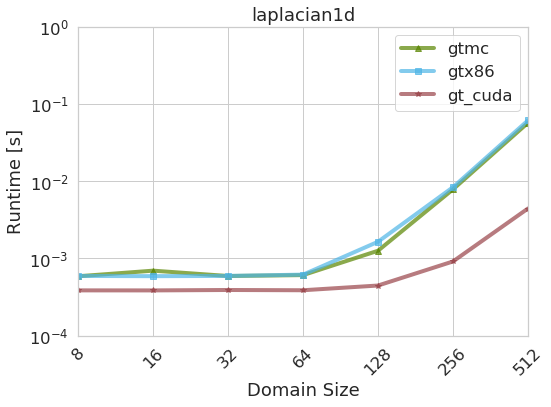

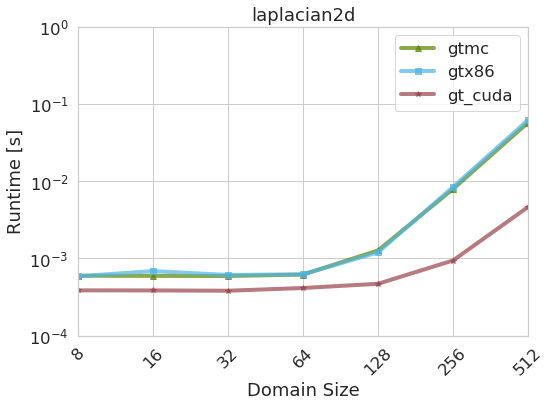

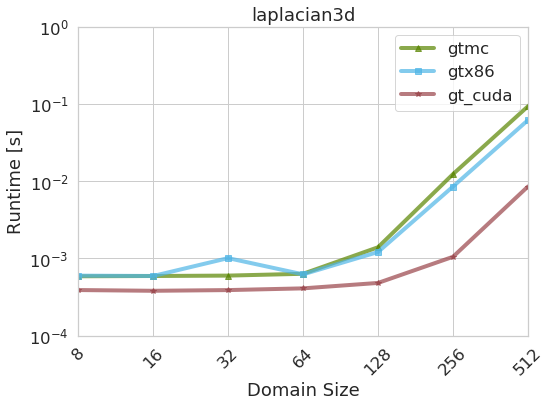

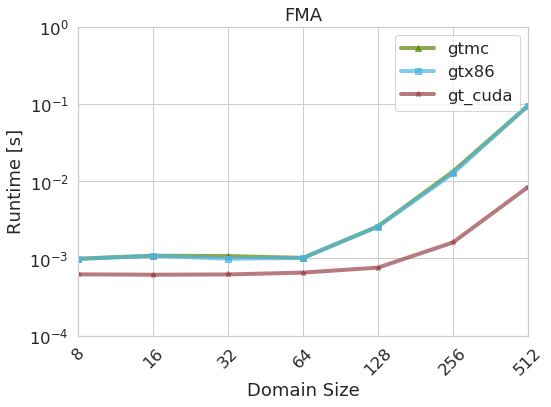

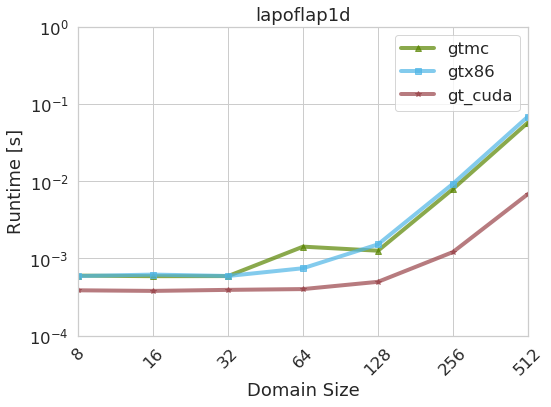

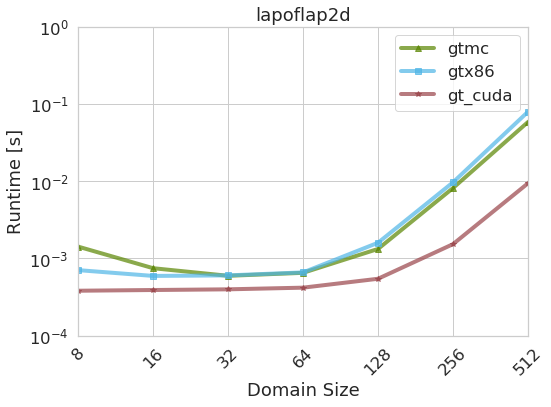

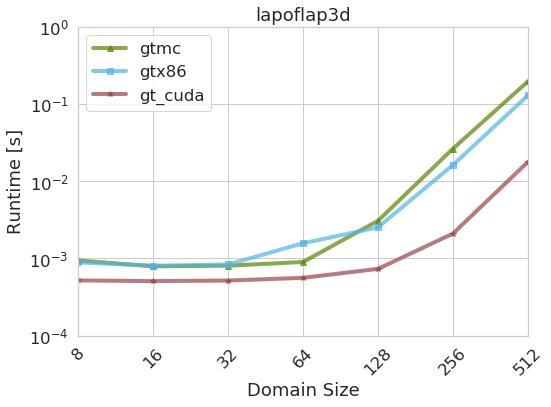

In [39]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

for stencil_name in stencil_name_list:
    df_color=pd.DataFrame({'laplacian1d': "#F5A802",'laplacian2d': "#598500", 'laplacian3d': "#8D02CC", 'FMA':"#DE2509",'lapoflap1d':"#A87402",'lapoflap2d':"#1D3800",'lapoflap3d':"#450099"},index=[0])
    f = plt.figure(figsize=(8, 6))

    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 4})
    gt4py_backend = ["gtmc", "gtx86", "gtcuda"]

    with sns.axes_style("whitegrid"):

            for stencil in [stencil_name]:
                    #sns.set_context("talk")
                    #sns.set()
                    #plt.figure(figsize=(10,5))
                    #plt.title(stencil)
                    plt.yscale("log")
                    xs=[0,1,2,3,4,5,6]
                    plt.xticks(xs,(8,16,32,64,128,256,512))
                    plt.xticks(rotation=45)
                    plt.xlim((0,6))
                    plt.ylim((1e-4,1e0))

                    #df_numpy = df[((df.stencil_name==stencil)&(df.backend=="numpy"))]
                    for gt4py_backend in ["gtmc"]:

                        df_plot=df[((df.stencil_name==stencil) & (df.gt4py_backend==gt4py_backend))]
                        plt.plot(xs,df_plot['run_avg'],"^-",label="gtmc",alpha=0.7,color='#598500')


                    for gt4py_backend in ["gtx86"]:

                        df_plot=df[((df.stencil_name==stencil) & (df.gt4py_backend==gt4py_backend))]

                        plt.plot(xs,df_plot['run_avg'],"s-",label="gtx86".format(gt4py_backend),alpha=0.7,color='#4FB5E6')


                    for gt4py_backend in ["gtcuda"]:

                        df_plot=df[((df.stencil_name==stencil) & (df.gt4py_backend==gt4py_backend))]

                        plt.plot(xs,df_plot['run_avg'],"*-",label="gt_cuda".format(gt4py_backend),alpha=0.7,color='#994349')



                    plt.legend()
                    plt.ylabel('Runtime [s]')
                    plt.xlabel('Domain Size')
                    plt.title(stencil_name)

    plt.tight_layout()
    plt.savefig("gt4py_" + stencil_name,dpi=300)

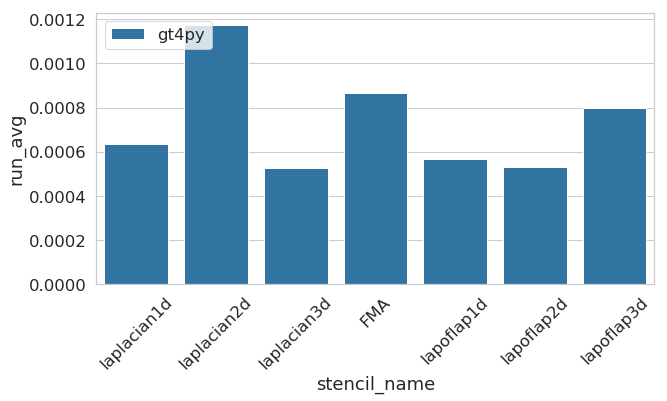

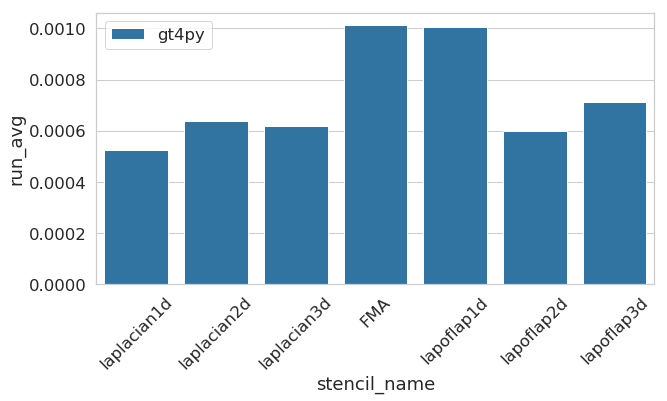

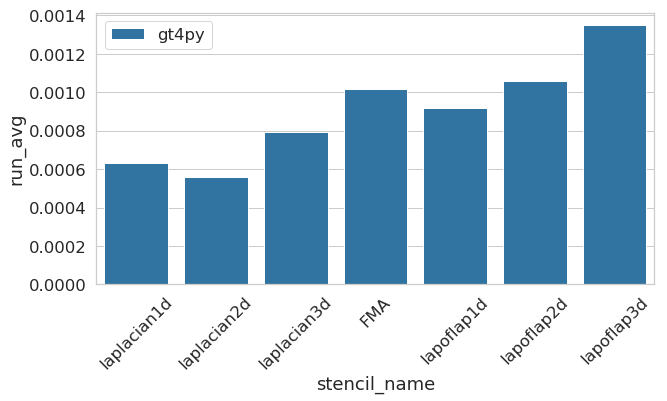

In [41]:

df_name = "gt4py_8_16_32_64" #Name of df to evaluate
df = pd.read_pickle("eval/{}_result.pkl".format(df_name))
df.tail(10)

df16=df.loc[df["nx"]==16]
plt.figure(figsize=(10,5))
chart=sns.barplot(x="stencil_name", y="run_avg", hue="backend",data=df16, ci=False)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.legend(loc='upper left')


df32=df.loc[df["nx"]==32]
plt.figure(figsize=(10,5))
chart=sns.barplot(x="stencil_name", y="run_avg", hue="backend",data=df32, ci=False)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.legend(loc='upper left')

df64=df.loc[df["nx"]==64]
plt.figure(figsize=(10,5))
chart=sns.barplot(x="stencil_name", y="run_avg", hue="backend",data=df64, ci=False)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.legend(loc='upper left')

In [85]:
df_name = "gt4py_8_16_32_64" #Name of df to evaluate
df = pd.read_pickle("eval/{}_result.pkl".format(df_name))
df.tail(10)

df16=df.loc[df["nx"]==128]
plt.figure(figsize=(10,5))
chart=sns.barplot(x="stencil_name", y="run_avg", hue="backend",data=df16, ci=False)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.legend(loc='upper left')

ValueError: min() arg is an empty sequence

<Figure size 720x360 with 0 Axes>

(10, 5)


AssertionError: 

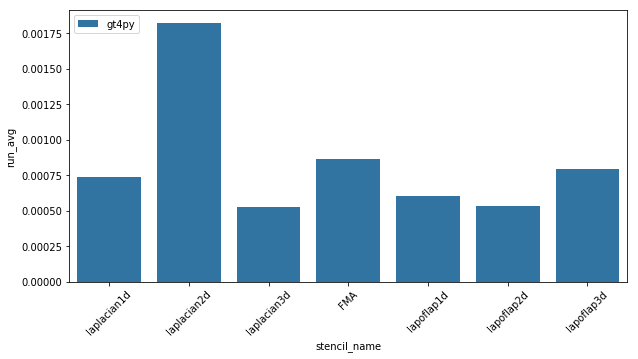

In [86]:
#############first try to add error bars. 
#the location of the bars is still wrong since the rows get ordered differently when .groupby is applied. 
#also I had to add data points for gt4py and numba_stencil where the function do not yet work.
#but this would be an option to get the error bars on top of everything.
#https://stackoverflow.com/questions/62820959/use-precalculated-error-bars-with-seaborn-and-barplot
#https://matplotlib.org/gallery/lines_bars_and_markers/errorbar_limits_simple.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-limits-simple-py

df_name = "gt4py_8_16_32_64" #Name of df to evaluate
df = pd.read_pickle("eval/{}_result.pkl".format(df_name))
df.tail(10)

df16=df.loc[df["nx"]==16]
plt.figure(figsize=(10,5))
chart =sns.barplot(x="stencil_name", y="run_avg", hue="backend",data=df16, ci=False)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.legend(loc='upper left')

conc2=[0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,6,6,6,6,6,6,7,7,7,7,7,7]
width = .25
add = [-2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width, -2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width,
       -2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width,-2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width,
       -2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width,-2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width,
       -2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width,-2.5*width, -1.5*width, -0.5*width, 0.5*width , 1.5*width, 2.5*width,
      ]
x = np.array(conc2)+np.array(add)
#print(x)

df16_stdev=df16.groupby(['stencil_name','backend']).mean()
df16_stdev=df16_stdev.append(df16_stdev[-4:-1])
#print(df16_stdev)
print(df16_stdev.shape)
plt.errorbar(x = x, y = df16_stdev['run_avg'],
            yerr = df16_stdev['run_stdev'],
             fmt='none', c= 'black', capsize = 2
            )
plt.show()


In [ ]:
#Clear df on disk
df_name = "test"
os.remove("eval/{}_result.pkl".format(df_name))

### Evaluate Runtime
We suspect that different number of iterations will lead to different runtime developments.
This can be tested with the option --save_runtime. The df runtimedevelopment can afterwards be evaluated.

In [ ]:
df_runtime = pd.read_pickle("eval/runtimedevelopment.pkl")
df_runtime.columns = ['runtime']
df_runtime.info()

In [ ]:
df_runtime.plot()
#numba_loop 32x32x32 stencil: lapoflap3d

In [ ]:
df_runtime.plot()
#numba_loop 64x64x64 stencil: lapoflap3d

In [ ]:
df_runtime.plot()
#numba_vector_function 64x64x64 stencil: lapoflap3d